# Support Vector Machines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Large Margin Classification

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris["data"][:,(2,3)] # petal length, petal length
y = iris["target"]

In [4]:
# y

In [5]:
setosa_or_versicolor = (y == 0)|(y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
from sklearn.svm import SVC

In [7]:
# SVM Classifier Model
svm_clf = SVC(kernel="linear",C=float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

Bad Models

In [8]:
x0 = np.linspace(0,5.5,200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

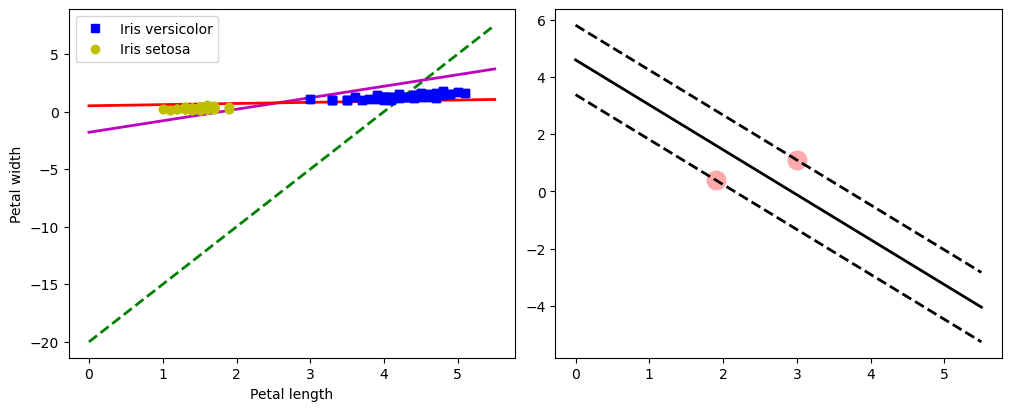

In [16]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, ax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    ax.plot(x0, decision_boundary, "k-", lw=2)
    ax.plot(x0, gutter_up, "k--", lw=2)
    ax.plot(x0, gutter_down, "k--", lw=2)


_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

axes[0].plot(x0, pred_1, "g--", lw=2)
axes[0].plot(x0, pred_2, "m-", lw=2)
axes[0].plot(x0, pred_3, "r-", lw=2)
axes[0].plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
axes[0].plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
axes[0].set(xlabel="Petal length", ylabel="Petal width")
axes[0].legend(loc="upper left", fontsize='medium')


plot_svc_decision_boundary(svm_clf, 0, 5.5, axes[1])
axes[0].plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
axes[0].plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
axes[0].set(xlabel="Petal length")

plt.show()